# CAPSTONE PROJECT - EMPLOYEE ATTRITION

## Understanding the Attrition Problem and the Dataset


####  HR Analytics helps us with interpreting organizational data. It finds out the people-related trends in the data and helps the HR Department take the appropriate steps to keep the organization running smoothly and profitably.Attrition is a corporate setup is one of the complex challenges that the people managers and the HRs personnel have to deal with.

####  Interestingly, machine learning models can be deployed to predict potential attrition cases, thereby helping the appropriate HR Personnel take the necessary steps to retain the employee.

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    roc_curve,
    auc,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve
)
from sklearn.feature_selection import SelectKBest,chi2,f_classif
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.combine import SMOTETomek
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df = pd.read_csv('HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


## 1. Basic Exploration and Cleaning

In [3]:
df.shape

(1470, 35)

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


### 1.2 Null Values and Duplicates

In [8]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
df.duplicated().sum()

0

###  Observation
#### No Null value found
#### No duplicates found

In [10]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [11]:
df.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)

In [12]:
df.drop(['EmployeeNumber'],inplace=True,axis=1)

### 1.3 Identifying Categorical and Discrete features

In [13]:
discrete_features = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
                 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
categorical_features = ['Attrition', 'BusinessTravel','Department', 'Education', 'EducationField','EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
                    'MaritalStatus','OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
                    'WorkLifeBalance']

### 1.4 Unique Values

In [14]:
for n, feature in enumerate(df.columns):
    if df[feature].nunique() < 10:
        if df[feature].nunique() == 1:
            df.drop([feature],inplace=True,axis=1)
            continue
        
        print(f'{n}. {feature.upper()}')
        print(df[feature].unique())
        print("="*50)
        print()

1. ATTRITION
[1 0]

2. BUSINESSTRAVEL
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

4. DEPARTMENT
['Sales' 'Research & Development' 'Human Resources']

6. EDUCATION
[2 1 4 3 5]

7. EDUCATIONFIELD
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

9. ENVIRONMENTSATISFACTION
[2 3 4 1]

10. GENDER
['Female' 'Male']

12. JOBINVOLVEMENT
[3 2 4 1]

13. JOBLEVEL
[2 1 3 4 5]

14. JOBROLE
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

15. JOBSATISFACTION
[4 2 3 1]

16. MARITALSTATUS
['Single' 'Married' 'Divorced']

21. OVERTIME
['Yes' 'No']

23. PERFORMANCERATING
[3 4]

24. RELATIONSHIPSATISFACTION
[1 4 2 3]

26. STOCKOPTIONLEVEL
[0 1 3 2]

28. TRAININGTIMESLASTYEAR
[0 3 2 5 1 4 6]

29. WORKLIFEBALANCE
[1 3 2 4]



## 2. Exploratory Data Analysis

### 2.1 Target Label Distribution

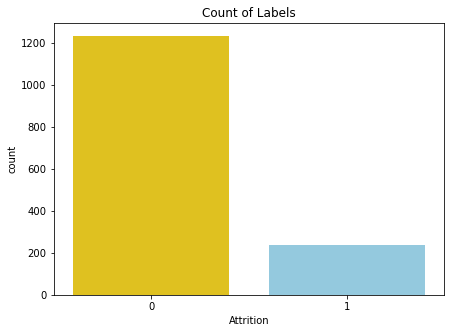

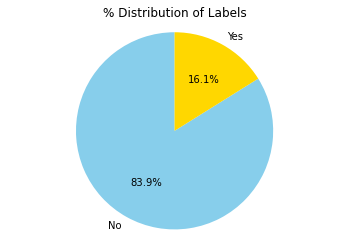

In [15]:
labels = ['Yes' if i==1 else 'No' for i in df['Attrition'].value_counts().index]

plt.figure(figsize=(7,5))
sns.countplot(x='Attrition',data=df,palette=['#FFD700','#87CEEB'])
plt.title("Count of Labels")
plt.show()



label_counts = [round(i/len(df)*100,2) for i in df['Attrition'].value_counts()]
plt.pie(label_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'gold'])
plt.title('% Distribution of Labels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Observation:
#### - Dataset is highly imbalanced. More than 80% of data belongs to employee who say No to Attrition while only 16% of employee atcually say Yes to attrition

## 2.2 Feature Distribution

In [16]:
def plot_distribution(feature,bins=None):
    corr = df['Attrition'].corr(df[feature])
    corr = np.round(corr, 3)
    
    plt.figure(figsize=(8, 6))
    colors = ['#FF6347', '#00FF7F']
    if bins == None:
        sns.histplot(x=feature, data=df, hue='Attrition', kde=True, palette=colors)
    else:
        sns.histplot(x=feature, data=df, hue='Attrition', kde=True, palette=colors,bins=100)

    
    plt.title(feature + ' (corr target = ' + str(corr) + ')')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()
    
def plot_countplot_with_percentage(var_select,ctg=False):
    tmp = pd.crosstab(df[var_select], df['Attrition'])
    tmp['Attr%'] = tmp[1] / (tmp[0] + tmp[1]) * 100
    if ctg == True  : 
        tmp = tmp.sort_values(1, ascending = False)

    color_palette = ['skyblue', 'salmon']
    sns.set_palette(color_palette)

    plt.figure(figsize=(12, 6))

    ax = sns.countplot(x=var_select, hue='Attrition', data=df)
    ax.set_title(str(var_select))
    ax.set_ylabel('Count')
    if ctg:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    

    # Plot the line plot using adjusted x-coordinates
    ax2 = ax.twinx()
    line_x = np.arange(len(tmp))
    ax2.plot(line_x, tmp['Attr%'], marker='o', color='black', label='% Attrition')
    ax2.set_ylabel('% Attrition')
    
    step_size = 10
    max_value = tmp['Attr%'].max() + step_size
    ax2.set_ylim(0, max_value)
    y_ticks = np.arange(0, max_value, step_size)
    ax2.set_yticks(y_ticks)
    
    
    ax.legend(['No','Yes'],loc='upper right')
    ax2.legend(loc='upper left')

    # Set x-tick positions and labels for the line plot

    plt.show()

### 2.1.1 Daily Rate/ MonthlyRate/HourlyRate

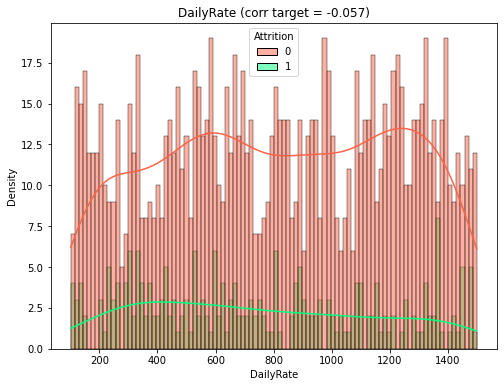

In [17]:
plot_distribution('DailyRate',100)

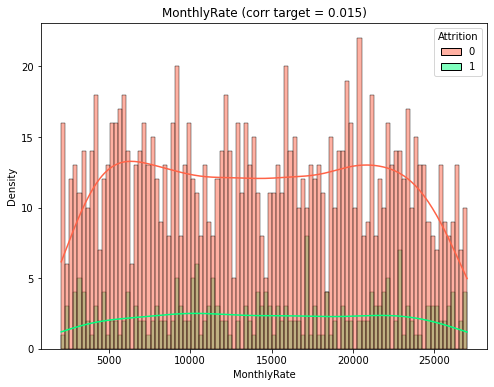

In [18]:
plot_distribution('MonthlyRate',100)

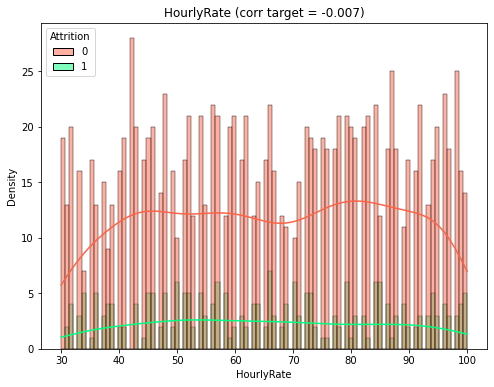

In [19]:
plot_distribution('HourlyRate',100)

### Observation:
#### - We can observe that Daily Rate/MonthlyRate/HourlyRate are bimodally distributed for all rates
#### - *Clearly the spread of data is high

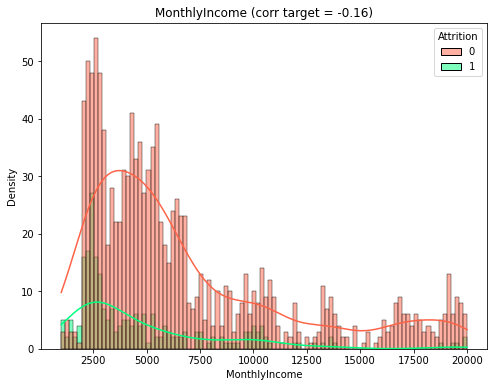

In [20]:
plot_distribution('MonthlyIncome',100)

### Observation:
#### - We can observe that Monthly Rate has normally distributed but it is skewed towards left
#### - Most of the employees have monthly income in the range of 2000-6000 dollars
#### - Clearly there some employees who have high income and attrition rate among them is low

## 2.2.2 Age

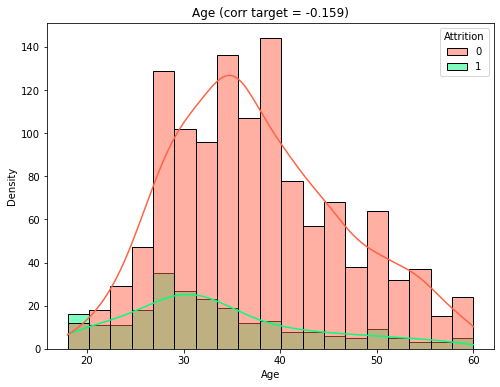

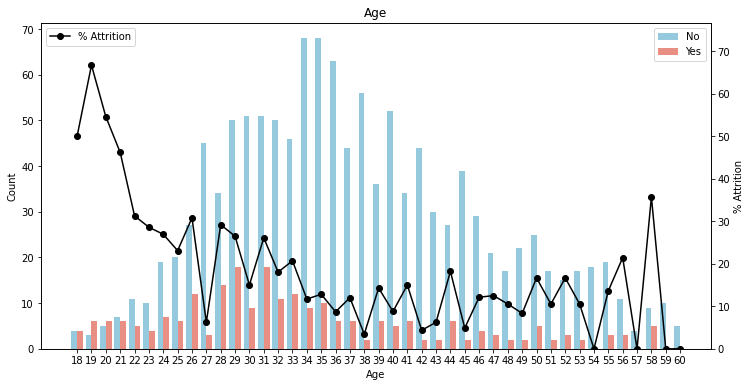

In [21]:
plot_distribution('Age')
plot_countplot_with_percentage('Age')

### Observation:
#### - We can observe that Age is normally distributed with a mean around 35.
#### - Generally, employees who are younger tend to leave the company more than older ones
#### - This might be because in early part of of carrier switching comapnies benefit employees and as they grow older they look for stability

## 2.2.2 DistanceFromHome

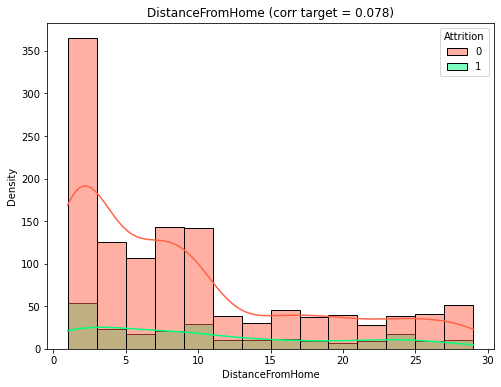

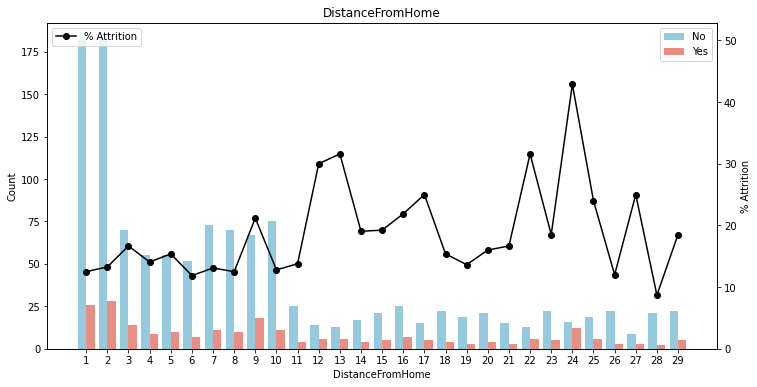

In [22]:
plot_distribution('DistanceFromHome')
plot_countplot_with_percentage('DistanceFromHome')


### Observation:
#### - We can see that majority of employees live closer to the company
#### - Also, attrition rate high among employees who are farther away from home. Although its not a general trend


## 2.2.3 NumCompaniesWorked

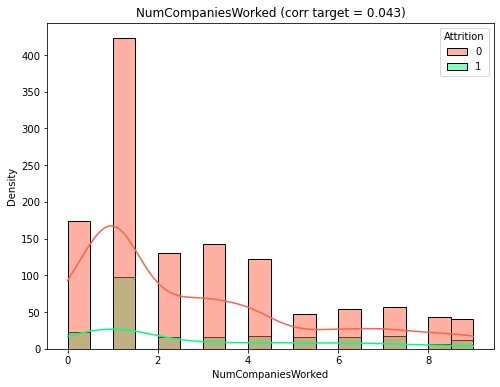

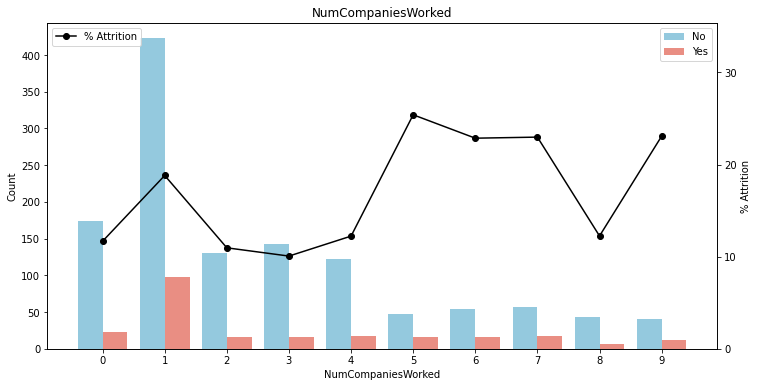

In [23]:
plot_distribution('NumCompaniesWorked')
plot_countplot_with_percentage('NumCompaniesWorked')

### Observation:
#### - It is interesting to observe that majority of employees have worked only in one company prior to IBM
#### - Moreover, people who have worked in more than 4 companies prior to IBM are more prone to leave the company


## 2.2.4 PercentSalaryHike

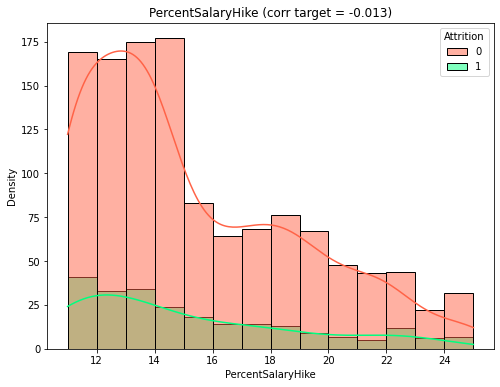

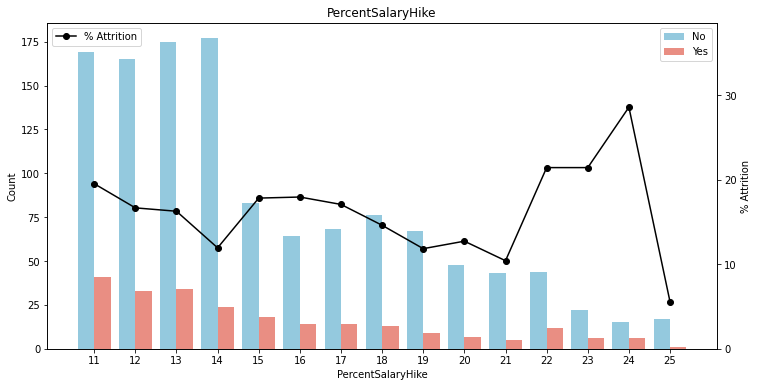

In [24]:
plot_distribution('PercentSalaryHike')
plot_countplot_with_percentage('PercentSalaryHike')

### Observation:
#### - Here, majority of employees get a hike between 10-15% and the ones with less hike tend to leave the company
#### - Although it is interesting to see that employees who get more than 22% hike also leave the company. This might be becuase of competitive offers at later stage in career


## 2.2.5 TotalWorkingYears

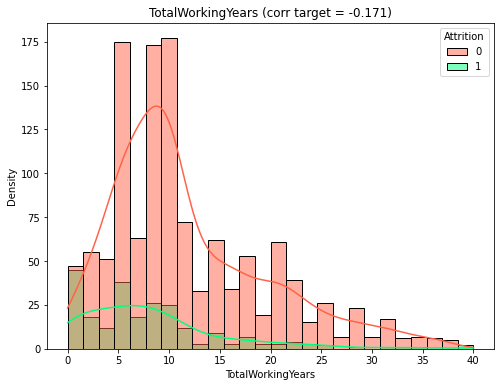

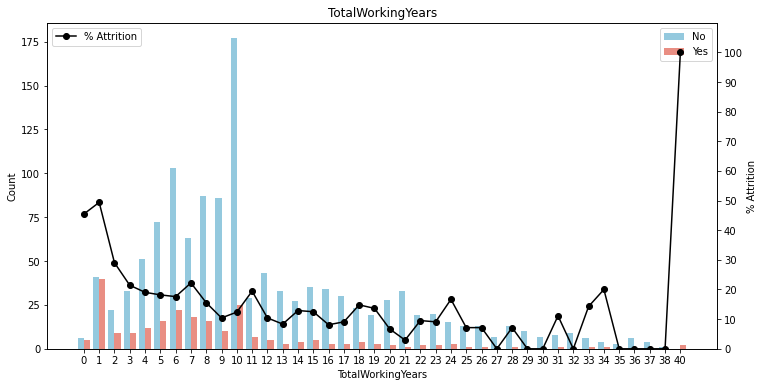

In [25]:
plot_distribution('TotalWorkingYears')
plot_countplot_with_percentage('TotalWorkingYears')


### Observation:
#### - Clearly, employees in early part of their career tend to switch companies and thats why attrition rate is high among them
#### - It is interesting to see that employees who have worked for 38 years tend to leave the company. This may indicate retirement


## 2.2.7 YearsInCurrentRole

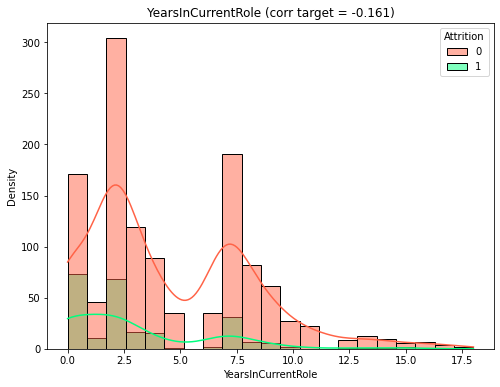

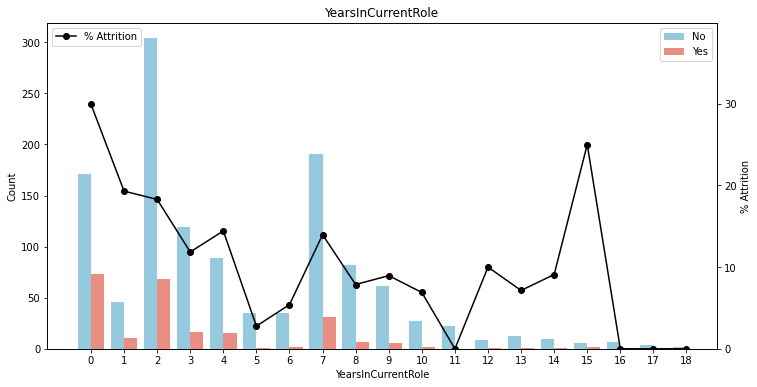

In [26]:
plot_distribution('YearsInCurrentRole')
plot_countplot_with_percentage('YearsInCurrentRole')


### Observation:
#### - We have majority datapoints for employees who have worked atleast 10 years in IBM and amongst them employees tend to live the company within a year or two
#### - It is safe to say that if an employee has worked for more than 4 years they are likely to stay
#### - Interestingly, we can see peaks in attrition for those who have worked for 23 years or more than 30 years. Since, there are not enough datapoints we can make a conclusive statement


## 2.2.8 YearsSinceLastPromotion

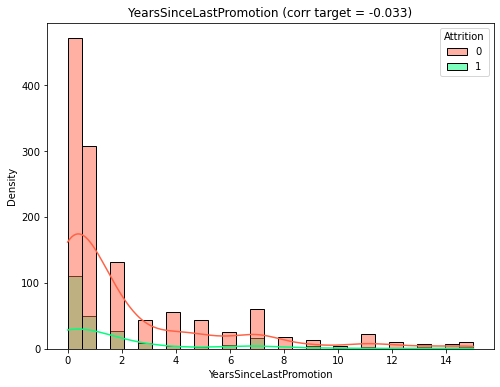

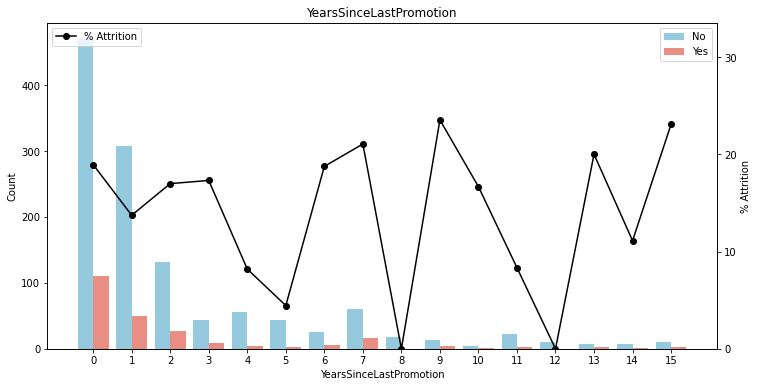

In [27]:
plot_distribution('YearsSinceLastPromotion')
plot_countplot_with_percentage('YearsSinceLastPromotion')

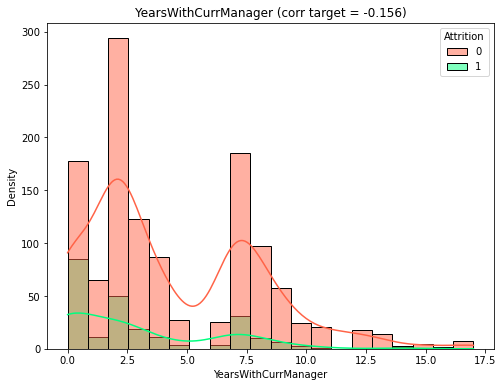

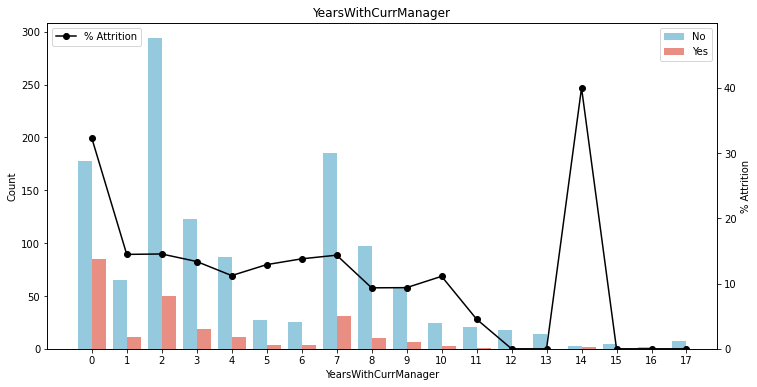

In [28]:
plot_distribution('YearsWithCurrManager')
plot_countplot_with_percentage('YearsWithCurrManager')

### Observation:
#### - Here also we can see that employee in early part of carrer tend of leave (assuming gradual promotion after working a year)
#### - But here, we can also see that employees who have not been promoted for more than 5 years tend to leave the company. Although due to lack of datapoints for such employees it can't be definite


## 2.3.0 Gender

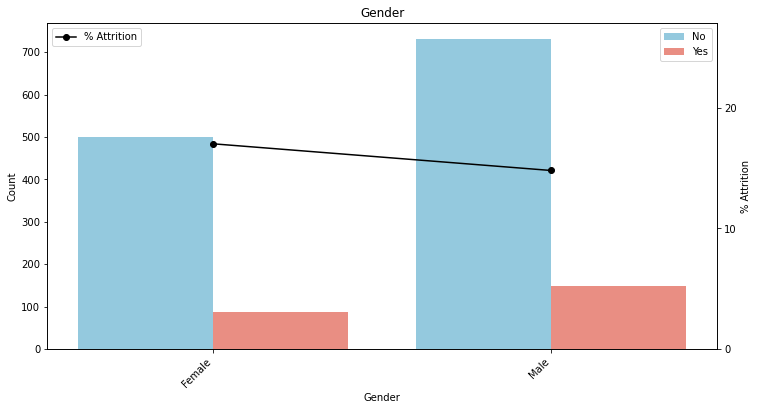

In [29]:
plot_countplot_with_percentage('Gender',True)

### Observation:
#### - Attrition % among both male and female tends to same


## 2.3.1 OverTime

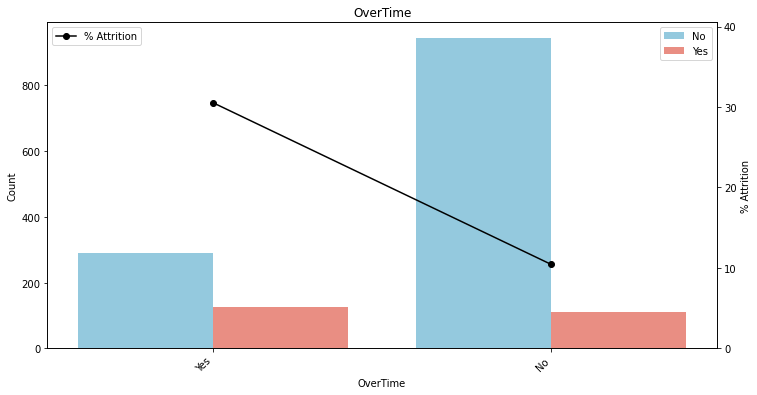

In [30]:
plot_countplot_with_percentage('OverTime',True)

### Observation:
#### - Attrition % amongst employee who Overtime tends to be more compared to those who don't overtime. Clearly, employee who work harder are also more likely to leave


## 2.3.2 BusinessTravel

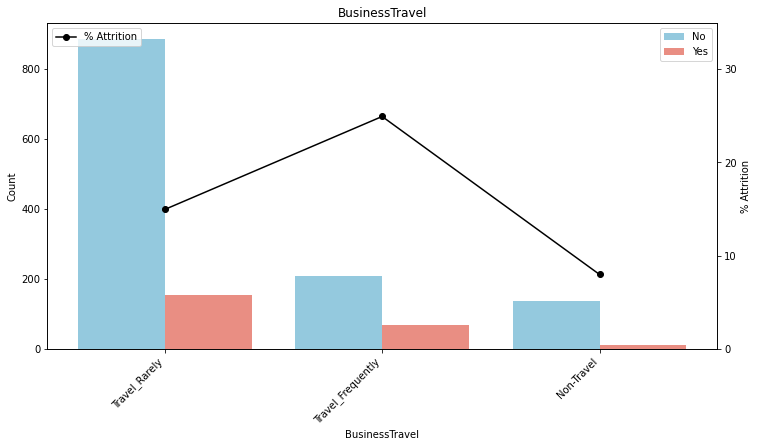

In [31]:
plot_countplot_with_percentage('BusinessTravel',True)

### Observation:
#### - Although there are more employees who travel rarely, attrition % seems to be higher for employee who travel frequently


## 2.3.3 Department

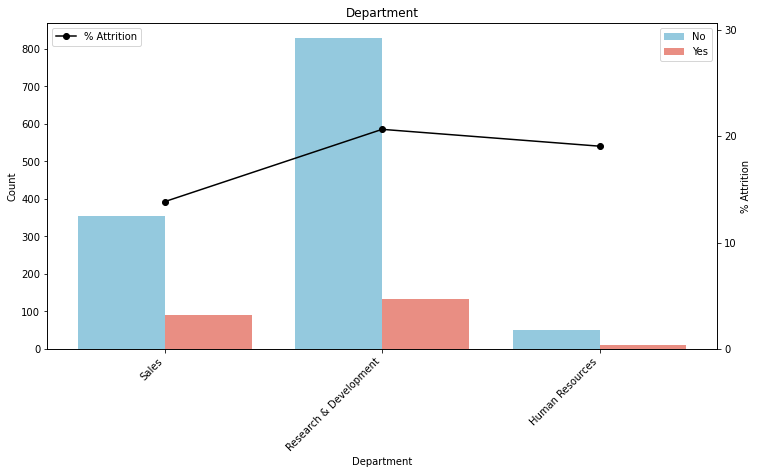

In [32]:
plot_countplot_with_percentage('Department',True)

### Observation:
#### - Attrition % amongst employee who are in R&D department tends to be more. Although there are greater number of employees in R&D as well.


## 2.3.5 EducationField

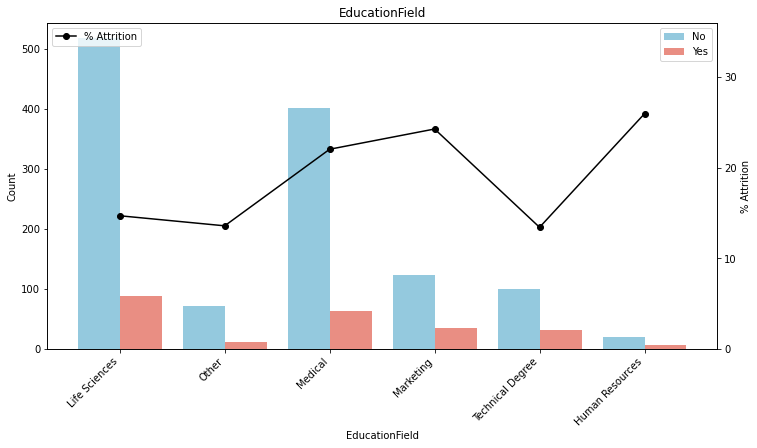

In [33]:
plot_countplot_with_percentage('EducationField',True)

### Observation:
#### - Employee who are from Life Sciences and Medical background are higher and their attrition % as well
#### - Although attrition % for Marketing and HR background are also high, but lack in datapoints


## 2.3.6 JobSatisfaction

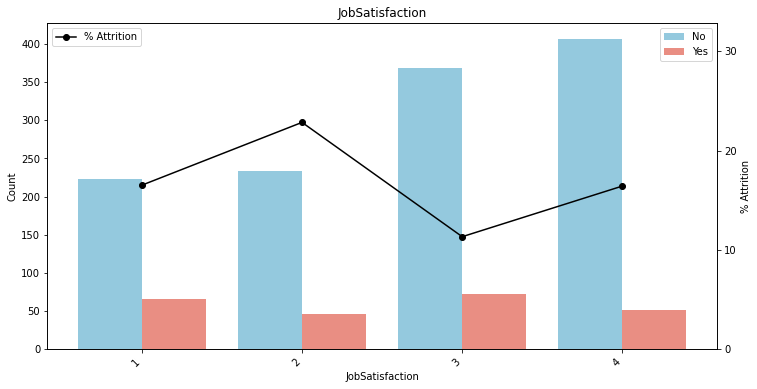

In [34]:
plot_countplot_with_percentage('JobSatisfaction',True)

### Observation:
#### - Clearly, employee with low job satisfaction tend show higher attrition rate


## 2.3.7 PerformanceRating

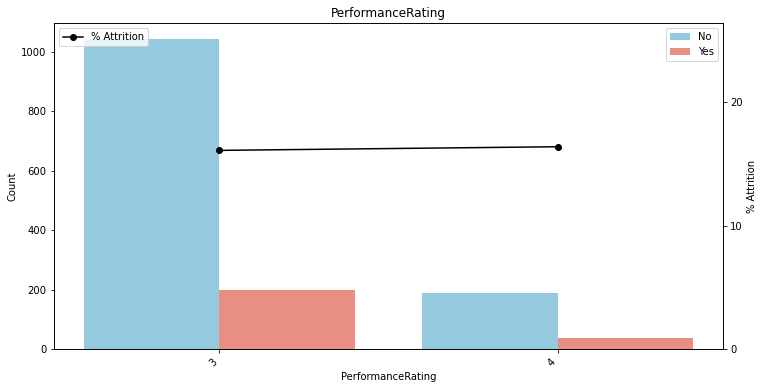

In [35]:
plot_countplot_with_percentage('PerformanceRating',True)

### Observation:
#### - We can see attrtion% remains same for both performance ratings. Although, there are less employees with a rating of 4 and attrition has been observed even in them¶


## 2.3.7 MaritalStatus

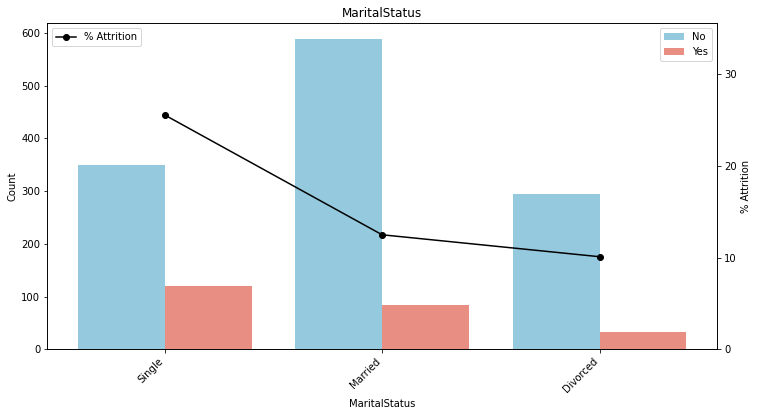

In [36]:
plot_countplot_with_percentage('MaritalStatus',True)

### Observation:
#### - Clearly, attrition% amongst single employee is higher


## 2.3.8 WorkLifeBalance

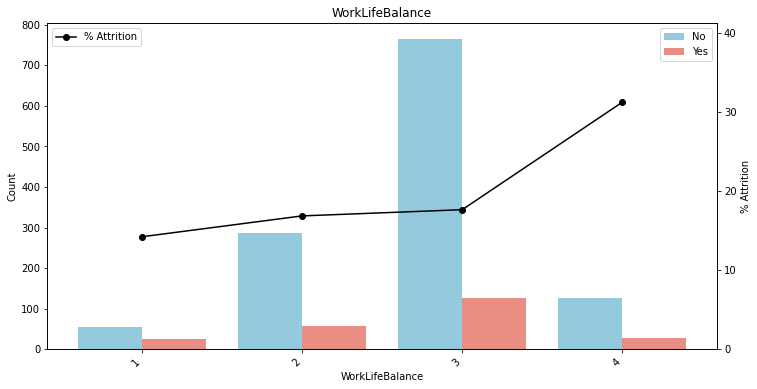

In [37]:
plot_countplot_with_percentage('WorkLifeBalance',True)

### Observation:
#### - We can see that employee with best work life balance are more likely to leave the company. Although employee with a good work life balance are greater in number and attrition amongst them is around 20%
#### -Since, less employees claim to have best worklife balance, we can't be sure of attrition%


## 2.3.9 JobInvolvement

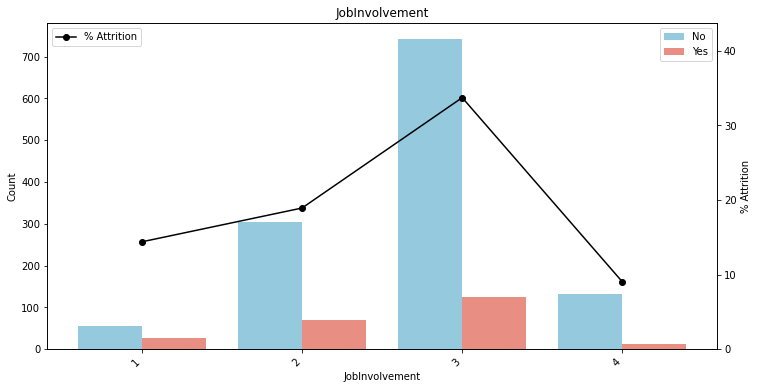

In [38]:
plot_countplot_with_percentage('JobInvolvement',True)

### Observation:
#### - Here it can be observed that employee who rate themseleves high in Job Involvement tend to work overtime and thus have greater attrition%

## Summary of Exploratory Data Analysis (EDA):

#### Income and Attrition: Monthly income is bimodally distributed, with most employees earning between 2000-6000 dollars. High-income employees have a lower attrition rate, but there are exceptions where employees with high income also leave.

#### Age and Attrition: Age is normally distributed, with younger employees showing higher attrition. As employees grow older, attrition tends to decrease, possibly due to seeking stability in later stages of their careers.

#### Distance and Attrition: Employees living closer to the company have lower attrition rates, while those farther away are more likely to leave.

#### Prior Work Experience: Majority of employees have worked in only one company before joining IBM. Employees with more than 4 prior work experiences tend to leave the company.

#### Hike and Attrition: Employees with lower hikes or more than 22% hike tend to leave the company, indicating a preference for competitive offers.

#### Tenure and Attrition: Employees in the early part of their careers are more prone to attrition. Those who have worked for more than 4 years are likely to stay, while attrition peaks for employees with more than 23 or 30 years of tenure.

#### Promotion and Attrition: Employees who have not been promoted for more than 5 years tend to leave the company.

#### Department and Attrition: Employees in R&D department have higher attrition, while Marketing and HR have relatively high attrition rates too.

#### Job Satisfaction: Low job satisfaction leads to higher attrition rates.

#### Marital Status and Attrition: Single employees show higher attrition rates.

#### Work-Life Balance: Employees rating themselves with the best work-life balance tend to have higher attrition, although their numbers are lower, making it less conclusive.

#### Job Involvement: Employees rating themselves with high job involvement tend to work overtime and have higher attrition rates.

### Overall, younger employees, those with higher job involvement, lower job satisfaction, and those living far from the company tend to have higher attrition rates. Additionally, the department, prior work experiences, and promotions play a role in determining attrition trends.

# 3. Data Preprocessing

## 3.1 Label Encoding

In [39]:
le = LabelEncoder()
for i in (categorical_features):
    if type(df[i][0]) == str:
        df[i] = le.fit_transform(df[i])

## 3.2 Correlation Analysis

<AxesSubplot:>

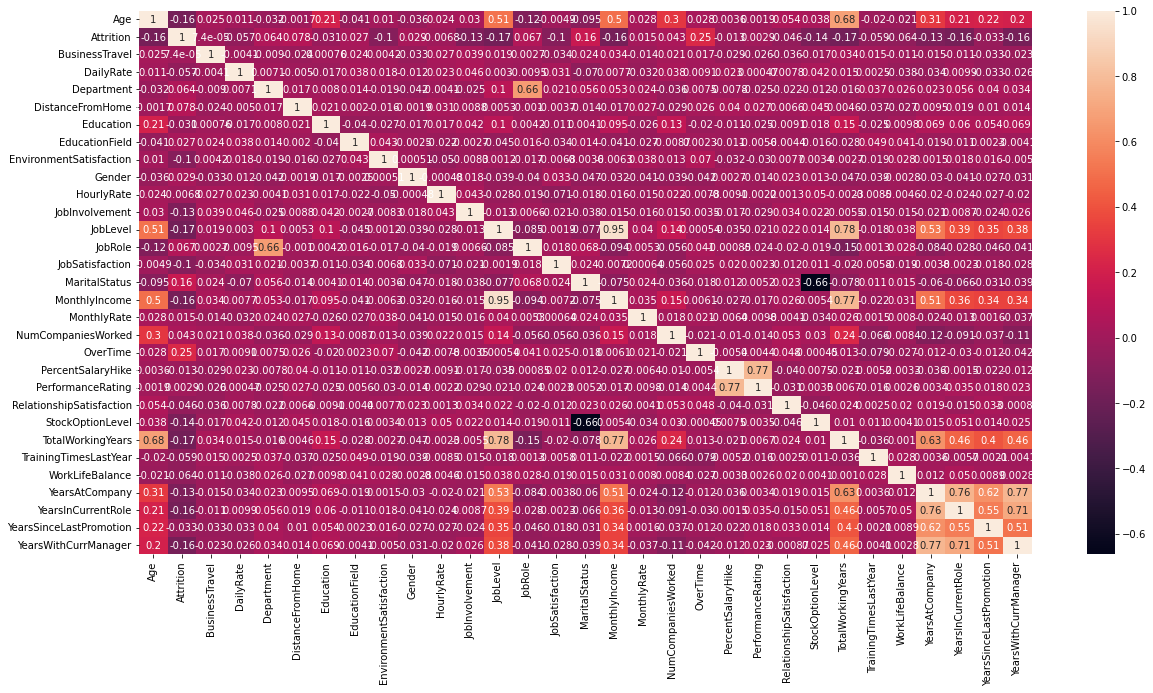

In [40]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(),annot=True,square=False)

### Observation:
#### We can clearly see that YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager are higly correlated with each other
#### They are also correlated highly with Age, Joblevel, MonthlyIncome and TotalWorkingYears

## 3.3 Targets and Features

In [41]:
X = df.drop(['Attrition'],axis=1)
y = df['Attrition']

## 3.3 Resampling dataset to handle imbalance

In [42]:
smoteTomek = SMOTETomek(random_state=48)
X,y = smoteTomek.fit_resample(X,y)

#### SMOTETomek is used to combine the strengths of SMOTE and Tomek links. It first applies SMOTE to oversample the minority class and then uses Tomek links to clean the resulting dataset by removing overlapping examples that can potentially lead to misclassifications. The combination of these two techniques helps to improve the overall performance and generalization of classifiers on imbalanced datasets. SMOTETomek can be particularly effective in scenarios where there is a significant class imbalance, and the decision boundary between classes is not well-defined.


## 3.4 Splitting Dataset

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=11)

## 3.5 Correlation of Features with Target

In [44]:
feautre_sel_df = X_train.copy(deep=True)
feautre_sel_df['Attrition'] = y_train

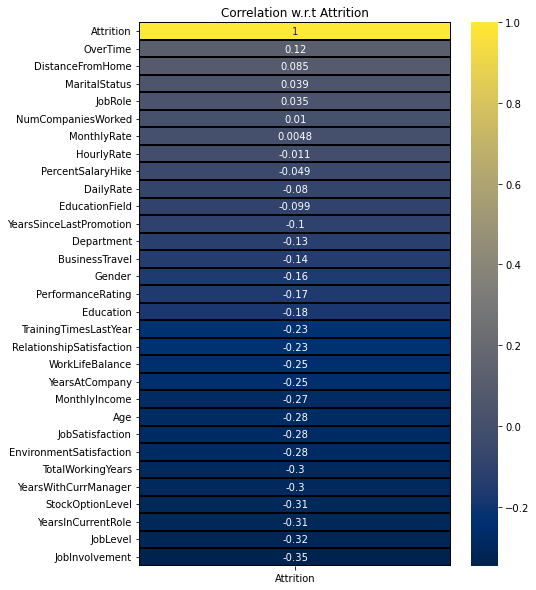

In [45]:
corr = feautre_sel_df.corrwith(feautre_sel_df['Attrition']).sort_values(ascending = False).to_frame()
corr.columns = ['Attrition']
plt.subplots(figsize = (7,10))
sns.heatmap(corr,annot = True,cmap='cividis',linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Attrition');

### Observation:
#### We can see that none of the features correlate with attrition label

# 3.6 Feature Selection
## 3.6.1. ChiSqaure Test to select Categorical Features

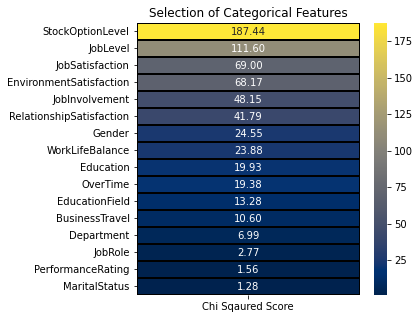

In [46]:
features = X_train.loc[:,categorical_features[1:]]
target = pd.DataFrame(y_train)

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Sqaured Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Sqaured Score'),annot = True,cmap = 'cividis',linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

### Observation:
#### We can see that Education, OverTime, EducationField, BusinessTravel, Department, JobRole, PerformanceRating, MaritalStatus have the least chi square score. They dont have significant impact on predicting the target

## 3.6.2. ANOVA Test to select Discrete Features

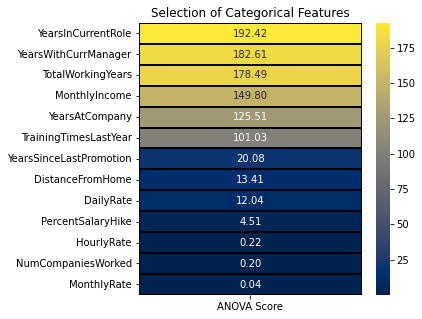

In [47]:
features = X_train.loc[:,discrete_features[1:]]
target = pd.DataFrame(y_train)

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = 'cividis',linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

### Observation:
#### We can see that YearsSinceLastPromotion, DistanceFromHome, DailyRate, PercentSalaryHike, HourlyRate, NumCompaniesWorked, MonthlyRate have the least ANOVA score. They dont have significant impact on predicting the target
#### We will drop irrelevant features

In [48]:
X_train = X_train.drop(columns = ['MonthlyRate', 'HourlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 
                                  'YearsSinceLastPromotion', 'DistanceFromHome','DailyRate',
                                  'PerformanceRating', 'Department', 'JobRole', 'EducationField', 
                                  'BusinessTravel', 'MaritalStatus','NumCompaniesWorked','OverTime'])

X_test = X_test.drop(columns = ['MonthlyRate', 'HourlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 
                                  'YearsSinceLastPromotion', 'DistanceFromHome','DailyRate',
                                  'PerformanceRating', 'Department', 'JobRole', 'EducationField', 
                                  'BusinessTravel', 'MaritalStatus' ,'NumCompaniesWorked','OverTime'])

## 3.6 Feature Scaling
### norm_features are those features which are not normally distributed. We will use Normalization to scale these features
### std_features are those features which are normally distributed. We will use Standardization to scale these features

In [50]:
std = StandardScaler()
norm = MinMaxScaler()

In [51]:
def scale(X):
    norm_features = ['MonthlyIncome','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager']
    
    std_features = ['Age','Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction',
                'RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance']
    
    X_scaled = X.copy(deep=True)
    
   
    for feature in norm_features:
        X_scaled[feature] = norm.fit_transform(X_scaled[[feature]])
    
    for feature in std_features:
        X_scaled[feature] = std.fit_transform(X_scaled[[feature]])
    
    return X_scaled

## 4. Modelling
#### For the employee attrition problem, we have selected a diverse set of classifiers to explore different modeling approaches and capture various aspects of the data. The RandomForestClassifier is powerful ensemble methods that can handle non-linearity and complex relationships, while the MLPClassifier brings in the capabilities of neural networks to capture intricate patterns. The GaussianProcessClassifier offers probabilistic modeling with uncertainty estimation, which can be useful for reliable predictions. Additionally, we have included the DecisionTreeClassifier, a simple and interpretable model for feature analysis. The KNNClassifier is chosen for its simplicity and effectiveness in dealing with data points in proximity, while the SVC (Support Vector Classifier) is known for its ability to find optimal hyperplanes to separate classes in high-dimensional spaces. Lastly, the AdaBoostClassifier focuses on iteratively improving performance by giving more emphasis to misclassified samples.
#### It's worth mentioning that we have experimented with both scaled and unscaled data for different models, as scaling may impact the performance of certain algorithms.
#### We will employ various metrics such as accuracy, precision, recall, and F1-score to gauge the overall classification performance. The ROC curve and Area Under the Curve (AUC) will be used to understand the trade-off between true positive and false positive rates. Additionally, confusion matrices will provide insights into the true negative, false positive, false negative, and true positive rates. These evaluation measures will help us compare and select the most suitable model for the task 

In [52]:
def calculate_metrics(y_true, y_pred, cm):

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    tn, fp, fn, tp = cm.ravel()
    tp_rate = tp / (tp + fn)
    fp_rate = fp / (fp + tn)
    tn_rate = tn / (tn + fp)
    fn_rate = fn / (fn + tp)

    result_list = [accuracy, precision, recall, f1, tp_rate, fp_rate, tn_rate, fn_rate]
    return result_list

def plot_feature_importance(classifier, x_train):
    if hasattr(classifier, 'feature_importances_'):
        feature_importances = classifier.feature_importances_
        features = x_train.columns

        sorted_idx = np.argsort(feature_importances)[::-1]

        plt.figure(figsize=(10, 6))
        plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align='center')
        plt.xticks(range(len(feature_importances)), np.array(features)[sorted_idx], rotation=90)
        plt.xlabel('Feature')
        plt.ylabel('Importance')
        plt.title('Feature Importance')
        plt.show()
        
def plot_roc_curve(model, x_test, y_test):

    # Predict probabilities for positive class
    y_score = model.predict_proba(x_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

def model(name,classifier, x_train, x_test, y_train, y_test):
    
    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    cross_val_auc = cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()
    roc_auc = roc_auc_score(y_test, prediction)

    plot_roc_curve(classifier, x_test, y_test)

    plot_feature_importance(classifier, x_train)

    print("\nClassification Report:\n")
    print(classification_report(y_test, classifier.predict(x_test)))

    cm = confusion_matrix(y_test, classifier.predict(x_test))
    tn, fp, fn, tp = cm.ravel()
    tp_rate = round((tp / (tp + fn))*100,2)
    fp_rate = round((fp / (fp + tn))*100,2)
    tn_rate = round((tn / (tn + fp))*100,2)
    fn_rate = round((fn / (fn + tp))*100,2)
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [tn,fp,fn,tp]
    percentages = [tn_rate,fp_rate,fn_rate,tp_rate]
    labels = [f'{v1}\n{v2}\n{v3}%' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, cmap='Blues', fmt='')
    plt.show()
   
    result_list = calculate_metrics(y_test, prediction, cm)
    return result_list

In [53]:
classifiers = [
    RandomForestClassifier(random_state=42),
    MLPClassifier(random_state=42),
    GaussianProcessClassifier(random_state=42),
    DecisionTreeClassifier(random_state=42),
    AdaBoostClassifier(random_state=48),
    KNeighborsClassifier(),
    SVC(random_state=42,probability=True)
]

classifier_names = [
    'RandomForest',
    'MLPClassifier',
    'GaussianProcess',
    'DecisionTree',
    'AdaBoostClassifier'
    'KNN',
    'SVC'
]

# Create a dictionary to store the results
results_dict = {}

### DecisionTreeClassfier

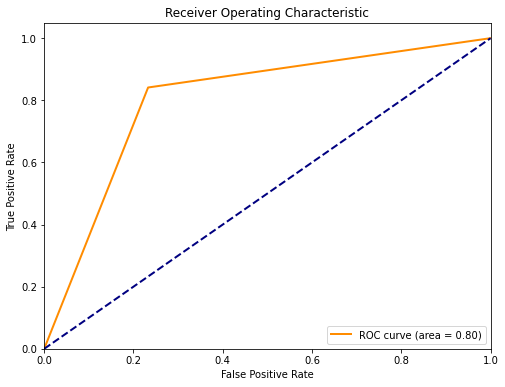

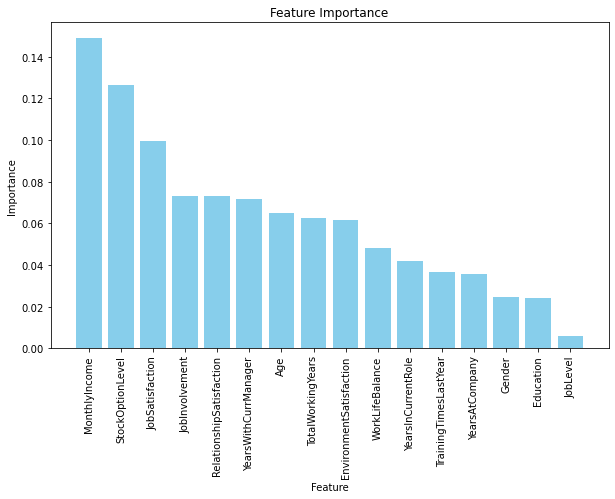


Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       232
           1       0.78      0.84      0.81       233

    accuracy                           0.80       465
   macro avg       0.81      0.80      0.80       465
weighted avg       0.81      0.80      0.80       465



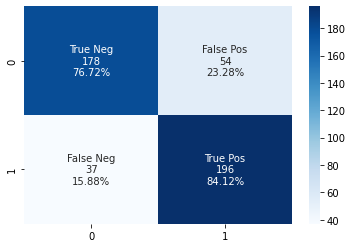

In [54]:
classifier_results = model('DecisionTree',DecisionTreeClassifier(random_state=42), X_train, X_test, y_train, y_test)
results_dict['DecisionTree'] = classifier_results

### RandomForest Classifier

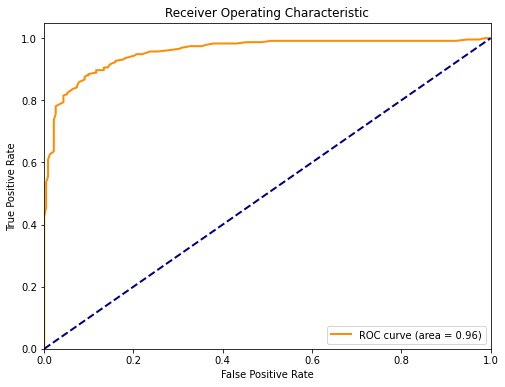

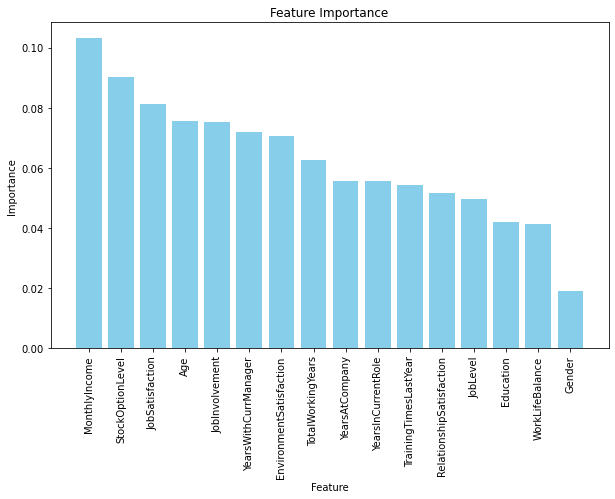


Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       232
           1       0.88      0.89      0.89       233

    accuracy                           0.89       465
   macro avg       0.89      0.89      0.89       465
weighted avg       0.89      0.89      0.89       465



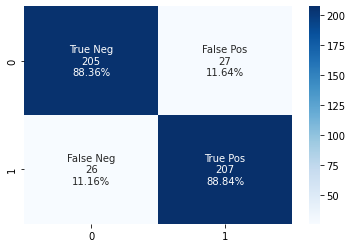

In [55]:
classifier_results = model('RandomForest',RandomForestClassifier(random_state=42), X_train, X_test, y_train, y_test)
results_dict['RandomForest'] = classifier_results


### GaussianProcess Classifier

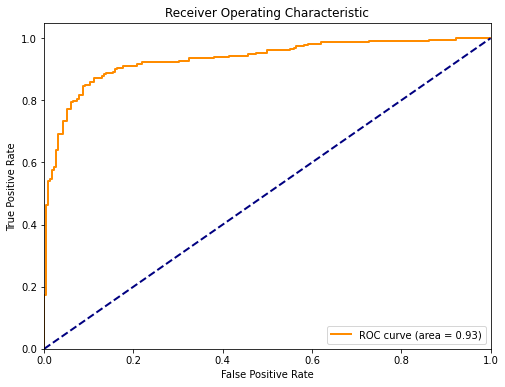


Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.84      0.87       232
           1       0.85      0.90      0.88       233

    accuracy                           0.87       465
   macro avg       0.87      0.87      0.87       465
weighted avg       0.87      0.87      0.87       465



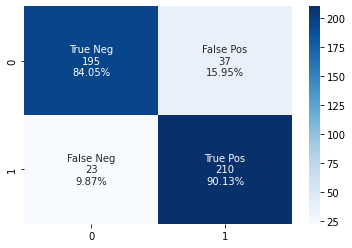

In [56]:
classifier_results = model('GaussianProcess',GaussianProcessClassifier(random_state=42), scale(X_train), scale(X_test), y_train, y_test)
results_dict['GaussianProcess'] = classifier_results

### MultiLayerPerceptron Classifier

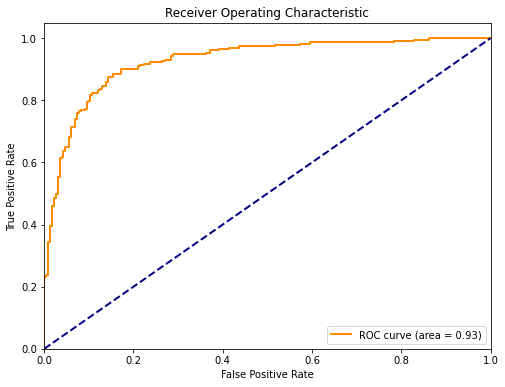


Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       232
           1       0.86      0.85      0.86       233

    accuracy                           0.86       465
   macro avg       0.86      0.86      0.86       465
weighted avg       0.86      0.86      0.86       465



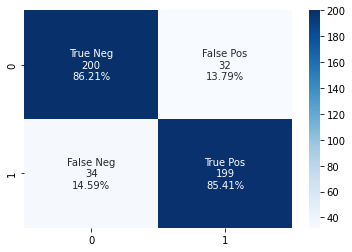

In [57]:
classifier_results = model('MLPClassifier',MLPClassifier(random_state=42), scale(X_train), scale(X_test), y_train, y_test)
results_dict['MLPClassifier'] = classifier_results

### AdaBoostClassfier

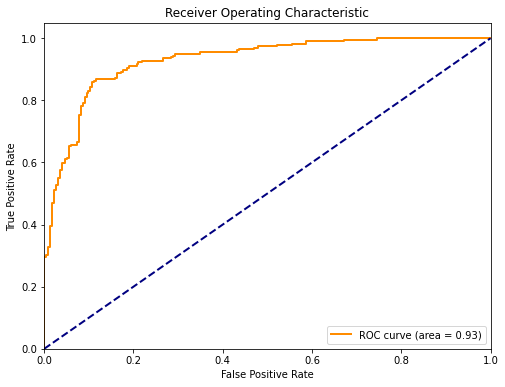

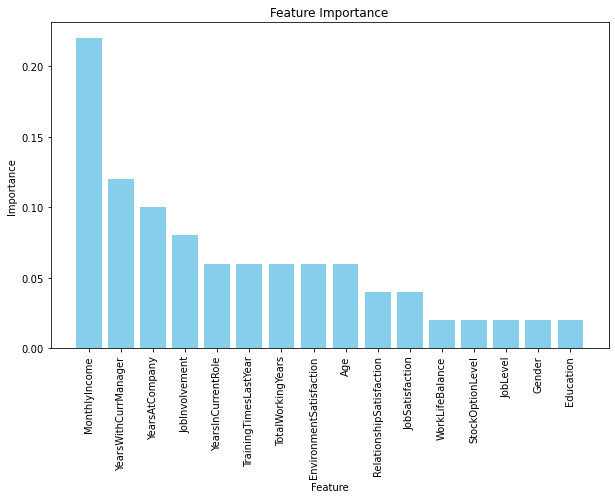


Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       232
           1       0.84      0.88      0.86       233

    accuracy                           0.86       465
   macro avg       0.86      0.86      0.86       465
weighted avg       0.86      0.86      0.86       465



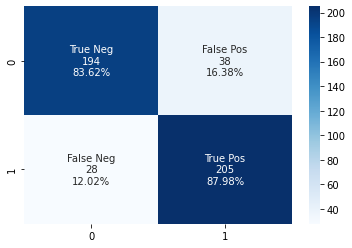

In [58]:
classifier_results = model('AdaBoostClassifier',AdaBoostClassifier(random_state=48), X_train, X_test, y_train, y_test)
results_dict['AdaBoostClassifier'] = classifier_results

### KNN Classifier

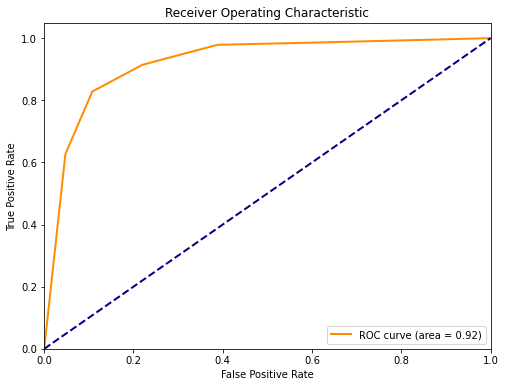


Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.78      0.84       232
           1       0.81      0.91      0.86       233

    accuracy                           0.85       465
   macro avg       0.85      0.85      0.85       465
weighted avg       0.85      0.85      0.85       465



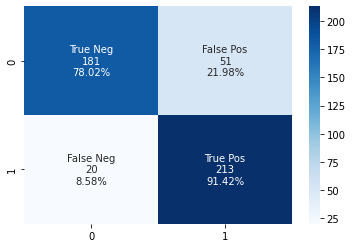

In [59]:
classifier_results = model('KNN',KNeighborsClassifier(), scale(X_train), scale(X_test), y_train, y_test)
results_dict['KNN'] = classifier_results

### Support Vector Classifier

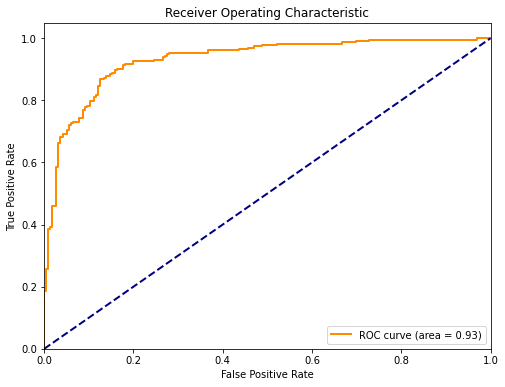


Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       232
           1       0.88      0.84      0.86       233

    accuracy                           0.86       465
   macro avg       0.86      0.86      0.86       465
weighted avg       0.86      0.86      0.86       465



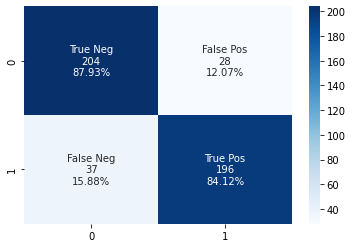

In [60]:
classifier_results = model('SVC',SVC(random_state=48,probability=True), scale(X_train), scale(X_test), y_train, y_test)
results_dict['SVC'] = classifier_results

In [61]:
for key,val in results_dict.items():
    results_dict[key] = [round(i*100,2) for i in val]

In [62]:
results_df = pd.DataFrame.from_dict(results_dict, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TP%', 'FP%', 'TN%', 'FN%'])
results_df = results_df.sort_values(by=['Accuracy', 'F1-Score', 'Precision', 'Recall'], ascending=False)
results_df

,Accuracy,Precision,Recall,F1-Score,TP%,FP%,TN%,FN%
RandomForest,88.60,88.46,88.84,88.65,88.84,11.64,88.36,11.16
GaussianProcess,87.10,85.02,90.13,87.50,90.13,15.95,84.05,9.87
SVC,86.02,87.50,84.12,85.78,84.12,12.07,87.93,15.88
AdaBoostClassifier,85.81,84.36,87.98,86.13,87.98,16.38,83.62,12.02
MLPClassifier,85.81,86.15,85.41,85.78,85.41,13.79,86.21,14.59
KNN,84.73,80.68,91.42,85.71,91.42,21.98,78.02,8.58
DecisionTree,80.43,78.40,84.12,81.16,84.12,23.28,76.72,15.88


### Model Evaluation:
#### We have evaluated several classifiers on the employee attrition problem and calculated various performance metrics such as accuracy, precision, recall, and F1-score. The results show that all models perform reasonably well, with accuracy ranging from 80.43% to 88.60%.

#### The KNN classifier stands out with the highest recall (91.42%), indicating its ability to correctly identify employees who will leave.

#### On the other hand, the GaussianProcess classifier has the highest precision (85.02%), suggesting it produces fewer false positives.

#### The RandomForest exhibit well-balanced performance across different metrics.



## 5. Hyperparameter Tunning

In [63]:
def print_classification_report(classifier, X, y):
    y_pred = classifier.predict(X)
    report = classification_report(y, y_pred)
    print("Classification Report:")
    print(report)

In [64]:
def hyperparameter_tuning_and_evaluation(model, X_train,X_test, y_train,y_test, param_grid):
    # Perform Grid Search with 5-fold cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params = grid_search.best_params_

    return best_params

In [65]:
tuned_results = {}

## Random Forest Classifier

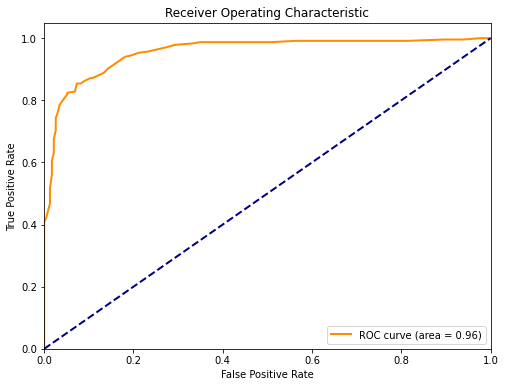

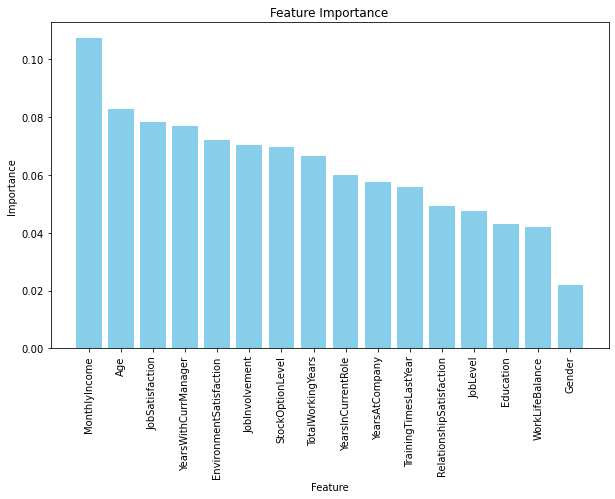


Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       232
           1       0.89      0.87      0.88       233

    accuracy                           0.88       465
   macro avg       0.88      0.88      0.88       465
weighted avg       0.88      0.88      0.88       465



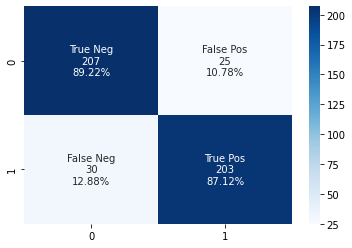

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [66]:
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
best_params = hyperparameter_tuning_and_evaluation(RandomForestClassifier(random_state=42), X_train, X_test, y_train, y_test,param_grid)
classifier_results = model('RandomForest',RandomForestClassifier(**best_params), X_train, X_test, y_train, y_test)
tuned_results['RandomForest'] = classifier_results
print(best_params)


### MultiLayerPeceptronClassifier

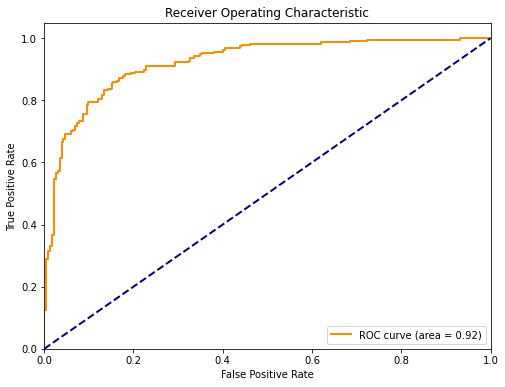


Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       232
           1       0.85      0.85      0.85       233

    accuracy                           0.85       465
   macro avg       0.85      0.85      0.85       465
weighted avg       0.85      0.85      0.85       465



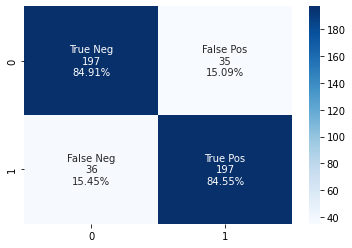

{'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}


In [67]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

best_params = hyperparameter_tuning_and_evaluation(MLPClassifier(random_state=42), scale(X_train), scale(X_test), y_train, y_test,param_grid)
classifier_results = model('MLPClassifier',MLPClassifier(**best_params), scale(X_train), scale(X_test), y_train, y_test)
tuned_results['MLPClassifier'] = classifier_results
print(best_params)

### AdaboostClassifier

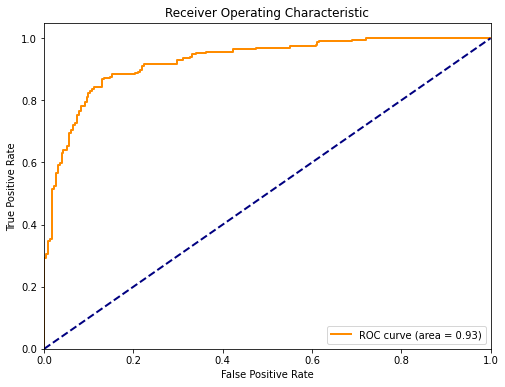

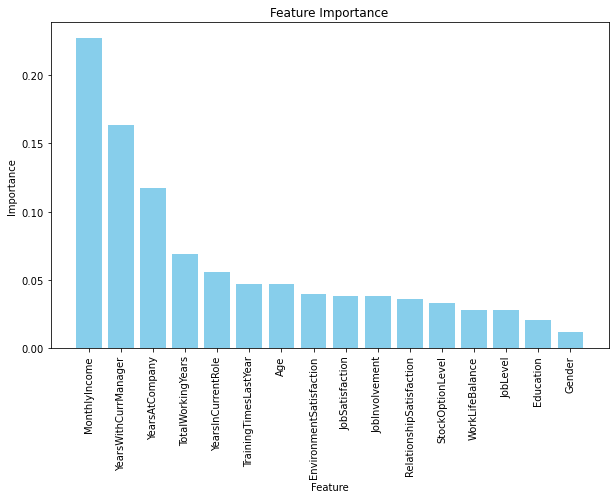


Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       232
           1       0.85      0.88      0.87       233

    accuracy                           0.86       465
   macro avg       0.86      0.86      0.86       465
weighted avg       0.86      0.86      0.86       465



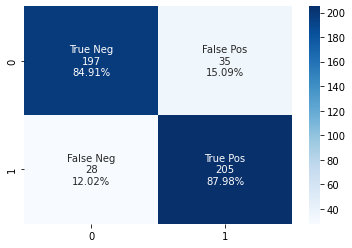

{'learning_rate': 0.1, 'n_estimators': 1000}


In [68]:
param_grid = {
    'n_estimators': [700, 900, 1000, 1100, 1200],
    'learning_rate': [0.1, 0.5, 1.0],
}

best_params = hyperparameter_tuning_and_evaluation(AdaBoostClassifier(random_state=42), X_train, X_test, y_train, y_test,param_grid)
classifier_results = model('AdaBoostClassifier',AdaBoostClassifier(**best_params), X_train, X_test, y_train, y_test)
tuned_results['AdaBoostClassifier'] = classifier_results
print(best_params)


### GaussianProcessClassifier

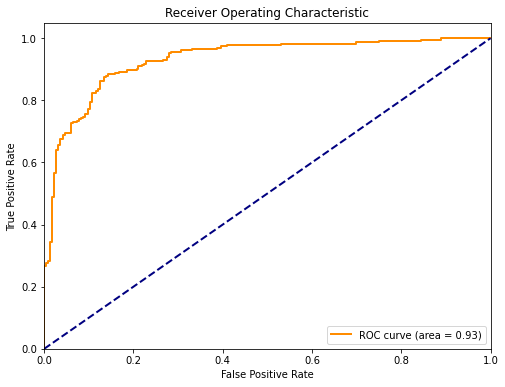


Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       232
           1       0.87      0.86      0.87       233

    accuracy                           0.87       465
   macro avg       0.87      0.87      0.87       465
weighted avg       0.87      0.87      0.87       465



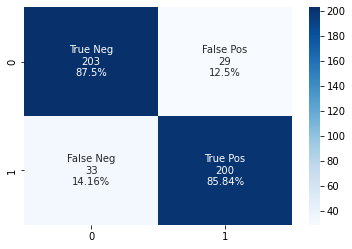

{'kernel': 1**2 * RBF(length_scale=1), 'max_iter_predict': 50, 'optimizer': 'fmin_l_bfgs_b'}


In [69]:
from sklearn.gaussian_process.kernels import RBF

param_grid = {
    'kernel': [1.0 * RBF(length_scale=1.0)],
    'optimizer': ['fmin_l_bfgs_b', 'fmin_ncg'],
    'max_iter_predict': [50, 100, 200]
}
best_params = hyperparameter_tuning_and_evaluation(GaussianProcessClassifier(), scale(X_train), scale(X_test), y_train, y_test,param_grid)
classifier_results = model('GaussianProcess',GaussianProcessClassifier(**best_params), scale(X_train), scale(X_test), y_train, y_test)
tuned_results['GaussianProcess'] = classifier_results
print(best_params)

### KNN Classifier

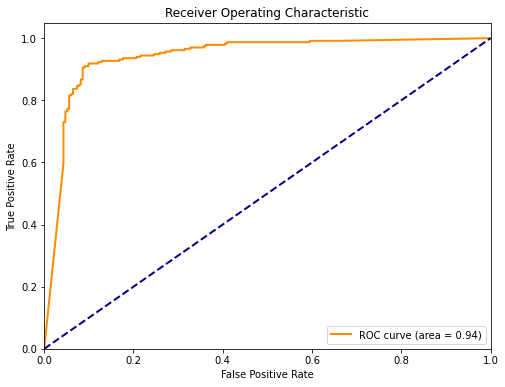


Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.80      0.86       232
           1       0.82      0.94      0.88       233

    accuracy                           0.87       465
   macro avg       0.87      0.87      0.87       465
weighted avg       0.87      0.87      0.87       465



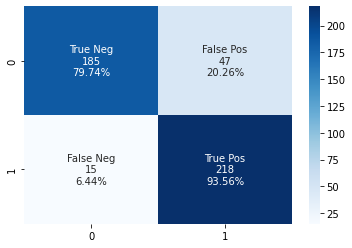

{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [70]:
param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}
best_params = hyperparameter_tuning_and_evaluation(KNeighborsClassifier(), scale(X_train), scale(X_test), y_train, y_test,param_grid)
classifier_results = model('KNN',KNeighborsClassifier(**best_params), scale(X_train), scale(X_test), y_train, y_test)
tuned_results['KNN'] = classifier_results
print(best_params)

### SVC

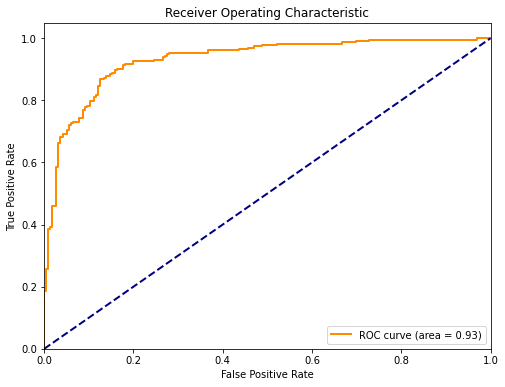


Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       232
           1       0.88      0.84      0.86       233

    accuracy                           0.86       465
   macro avg       0.86      0.86      0.86       465
weighted avg       0.86      0.86      0.86       465



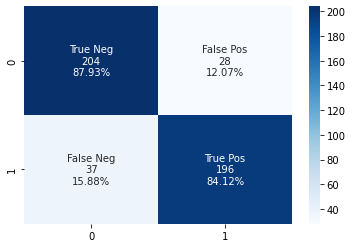

{'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}


In [71]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}
best_params = hyperparameter_tuning_and_evaluation(SVC(random_state=42,probability=True), scale(X_train), scale(X_test), y_train, y_test,param_grid)
classifier_results = model('SVC',SVC(**best_params,probability=True), scale(X_train), scale(X_test), y_train, y_test)
tuned_results['SVC'] = classifier_results
print(best_params)

### DecisionTree Classifier

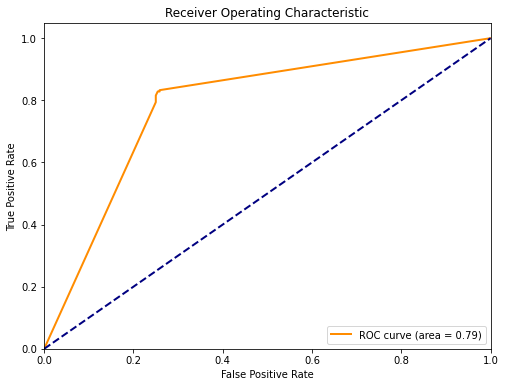

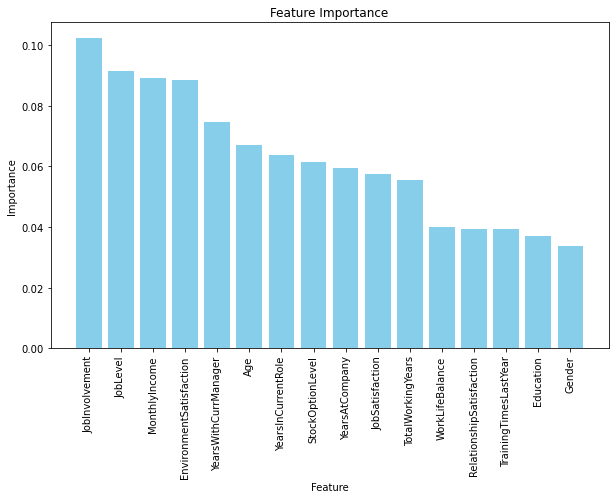


Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       232
           1       0.76      0.83      0.79       233

    accuracy                           0.78       465
   macro avg       0.79      0.78      0.78       465
weighted avg       0.79      0.78      0.78       465



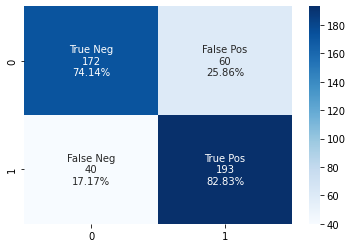

{'criterion': 'entropy', 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [72]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [15,25,35,45],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

best_params = hyperparameter_tuning_and_evaluation(DecisionTreeClassifier(random_state=42), X_train, X_test, y_train, y_test,param_grid)
classifier_results = model('DecisionTree',DecisionTreeClassifier(**best_params), X_train, X_test, y_train, y_test)
tuned_results['DecisionTree'] = classifier_results
print(best_params)


In [73]:
for key,val in tuned_results.items():
    tuned_results[key] = [round(i*100,2) for i in val]

In [74]:
tuned_df = pd.DataFrame.from_dict(tuned_results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TP%', 'FP%', 'TN%', 'FN%'])
tuned_df = tuned_df.sort_values(by=['Accuracy', 'F1-Score', 'Precision', 'Recall'], ascending=False)
tuned_df


,Accuracy,Precision,Recall,F1-Score,TP%,FP%,TN%,FN%
RandomForest,88.17,89.04,87.12,88.07,87.12,10.78,89.22,12.88
KNN,86.67,82.26,93.56,87.55,93.56,20.26,79.74,6.44
GaussianProcess,86.67,87.34,85.84,86.58,85.84,12.50,87.50,14.16
AdaBoostClassifier,86.45,85.42,87.98,86.68,87.98,15.09,84.91,12.02
SVC,86.02,87.50,84.12,85.78,84.12,12.07,87.93,15.88
MLPClassifier,84.73,84.91,84.55,84.73,84.55,15.09,84.91,15.45
DecisionTree,78.49,76.28,82.83,79.42,82.83,25.86,74.14,17.17
